In [1]:
import datetime
import re

import numpy
import pandas
import matplotlib.pyplot
import matplotlib.dates

dfany = pandas.read_csv("pip-downloads.csv", parse_dates=[0], infer_datetime_format=True)

In [96]:
def plotit(df, vertical, title, selection, islog=True, dropml=False):
    which = ["numpy", "scipy", "pandas", "matplotlib", "scikit-learn", "tensorflow", "torch", "root-numpy", "iminuit", "rootpy",
             "uproot", "awkward", "coffea"]
    if dropml:
        del which[which.index("tensorflow")]
        del which[which.index("scikit-learn")]
        del which[which.index("torch")]
    if isinstance(selection, str):
        df = df[df["os"] == selection]
    elif isinstance(selection, tuple) and len(selection) == 2:
        df = df[(df["os"] == selection[0]) | (df["os"] == selection[1])]
    elif selection is None:
        pass
    else:
        raise Exception
    df = df.groupby(["date", "project"])["count"].sum().unstack()[which]
    ax = df.fillna(0).rolling(60).mean().plot(figsize=(7, 4.3))
    matplotlib.pyplot.title(title)
    if islog:
        matplotlib.pyplot.yscale("log")
    matplotlib.pyplot.xlabel("")
    matplotlib.pyplot.ylabel("pip-installs/day, 60-day moving average")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", frameon=False)
    ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 11, 7)))
    ax.set_ylim((0.01, vertical))
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 5, 9]))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
    return ax

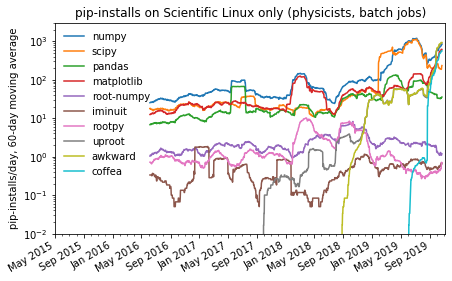

In [97]:
ax = plotit(dfany, 3000, "pip-installs on Scientific Linux only (physicists, batch jobs)", "Scientific Linux", dropml=True)

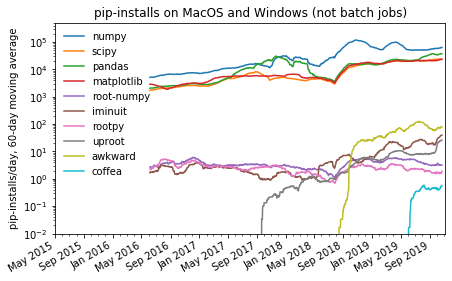

In [98]:
ax = plotit(dfany, 500000, "pip-installs on MacOS and Windows (not batch jobs)", ("MacOS", "Windows"), dropml=True)
ax.get_figure().savefig("pip-timeline.png")
ax.get_figure().savefig("pip-timeline.pdf")

In [49]:
dfany[dfany["project"] == "awkward"][["place", "count"]].groupby("place").sum().sort_values("count", ascending=False)

,count
place,
United States,112616
Europe,33798
Switzerland,25087
Other,13964
Asia,977
North America,150
South America,97
Middle East,62
Africa,54


In [68]:
simple = dfany.copy()
simple["place"] = simple["place"].apply(
    lambda x: "Other" if x in ("Asia", "North America", "South America", "Middle East", "Africa", "Oceana")
                else "Other Europe" if x == "Europe" else "(Australia)" if x == "Australia" else  x)

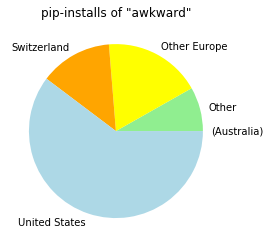

In [83]:
ax = simple[(simple["project"] == "awkward")][["place", "count"]].groupby("place").sum().plot.pie(y="count", legend=None,
                   colors=["purple", "lightgreen", "yellow", "orange", "lightblue"])
matplotlib.pyplot.ylabel("")
matplotlib.pyplot.title('pip-installs of "awkward"');
ax.get_figure().savefig("pip-country-awkward.png")
ax.get_figure().savefig("pip-country-awkward.pdf")

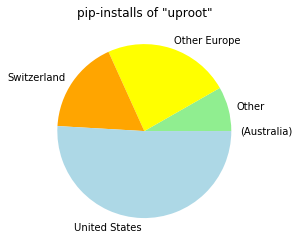

In [84]:
ax = simple[(simple["project"] == "uproot")][["place", "count"]].groupby("place").sum().plot.pie(y="count", legend=None,
                   colors=["purple", "lightgreen", "yellow", "orange", "lightblue"])
matplotlib.pyplot.ylabel("")
matplotlib.pyplot.title('pip-installs of "uproot"');
ax.get_figure().savefig("pip-country-uproot.png")
ax.get_figure().savefig("pip-country-uproot.pdf")

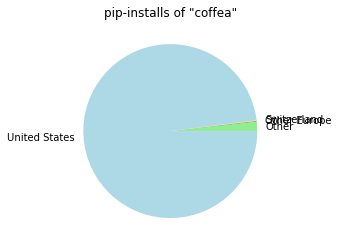

In [80]:
ax = simple[(simple["project"] == "coffea")][["place", "count"]].groupby("place").sum().plot.pie(y="count", legend=None,
                   colors=["lightgreen", "purple", "yellow", "lightblue", "orange"])
matplotlib.pyplot.ylabel("")
matplotlib.pyplot.title('pip-installs of "coffea"');